In [0]:
# Beat tracking example
from __future__ import print_function
import librosa



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# 1. Get the file path to the included audio example
# filename = librosa.util.example_audio_file()

# # 2. Load the audio as a waveform `y`
# #    Store the sampling rate as `sr`
# y, sr = librosa.load(filename)

# # 3. Run the default beat tracker
# tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# # 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 129.20 beats per minute


In [0]:
beat_times

array([ 0.11609977,  0.55727891,  0.99845805,  1.46285714,  1.92725624,
        2.39165533,  2.83283447,  3.29723356,  3.76163265,  4.22603175,
        4.69043084,  5.15482993,  5.61922902,  6.08362812,  6.52480726,
        6.98920635,  7.45360544,  7.91800454,  8.38240363,  8.87002268,
        9.31120181,  9.77560091, 10.24      , 10.70439909, 11.14557823,
       11.60997732, 12.07437642, 12.53877551, 13.0031746 , 13.4675737 ,
       13.93197279, 14.39637188, 14.83755102, 15.27873016, 15.74312925,
       16.20752834, 16.67192744, 17.11310658, 17.60072562, 18.04190476,
       18.52952381, 18.97070295, 19.43510204, 19.89950113, 20.36390023,
       20.80507937, 21.29269841, 21.73387755, 22.2214966 , 22.66267574,
       23.12707483, 23.59147392, 24.05587302, 24.49705215, 24.96145125,
       25.42585034, 25.91346939, 26.35464853, 26.81904762, 27.28344671,
       27.7478458 , 28.18902494, 28.65342404, 29.11782313, 29.60544218,
       30.06984127, 30.53424036, 30.9754195 , 31.43981859, 31.88

In [0]:
beat_frames

array([   5,   24,   43,   63,   83,  103,  122,  142,  162,  182,  202,
        222,  242,  262,  281,  301,  321,  341,  361,  382,  401,  421,
        441,  461,  480,  500,  520,  540,  560,  580,  600,  620,  639,
        658,  678,  698,  718,  737,  758,  777,  798,  817,  837,  857,
        877,  896,  917,  936,  957,  976,  996, 1016, 1036, 1055, 1075,
       1095, 1116, 1135, 1155, 1175, 1195, 1214, 1234, 1254, 1275, 1295,
       1315, 1334, 1354, 1373, 1394, 1414, 1434, 1453, 1473, 1493, 1513,
       1532, 1553, 1573, 1593, 1612, 1632, 1652, 1672, 1691, 1712, 1732,
       1752, 1771, 1791, 1811, 1831, 1850, 1871, 1890, 1911, 1931, 1951,
       1971, 1990, 2010, 2030, 2050, 2070, 2090, 2110, 2130, 2150, 2170,
       2190, 2209, 2229, 2249, 2269, 2289, 2309, 2328, 2348, 2368, 2388,
       2408, 2428, 2448, 2468, 2488, 2508, 2527, 2547])

In [0]:
filename

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\librosa\\util\\example_data\\Kevin_MacLeod_-_Vibe_Ace.ogg'

In [0]:
from IPython.display import Audio

In [0]:
import pandas as pd 

In [0]:
import numpy as np
import os

In [0]:
dataset = pd.read_csv("emotion.data")

In [0]:
os.chdir('drive/My Drive/emotion-classification')

In [0]:
pwd

'/content/drive/My Drive/emotion-classification'

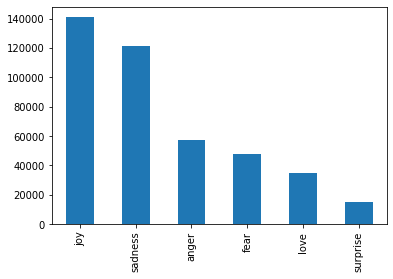

In [0]:
dataset.emotions.value_counts().plot.bar()

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

In [0]:
input_sentences = [text.split(" ") for text in dataset["text"].values.tolist()]
labels = dataset["emotions"].values.tolist()

In [0]:
# # Initialize word2id and label2id dictionaries that will be used to encode words and labels
word2id = dict()
label2id = dict()

max_words = 0 # maximum number of words in a sentence

# Construction of word2id dict
for sentence in input_sentences:
    for word in sentence:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(sentence) > max_words:
        max_words = len(sentence)
    
# Construction of label2id and id2label dicts
label2id = {l: i for i, l in enumerate(set(labels))}
id2label = {v: k for k, v in label2id.items()}
id2label


{0: 'surprise', 1: 'fear', 2: 'sadness', 3: 'love', 4: 'joy', 5: 'anger'}

In [0]:
(set(labels))

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [0]:
len(word2id)

75302

In [0]:

import k
# Encode input words and labels
X = [[word2id[word] for word in sentence] for sentence in input_sentences]
Y = [label2id[label] for label in labels]

# Apply Padding to X
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, max_words)

# Convert Y to numpy array
Y = keras.utils.to_categorical(Y, num_classes=len(label2id), dtype='float32')

# Print shapes
print("Shape of X: {}".format(X.shape))
print("Shape of Y: {}".format(Y.shape))

Shape of X: (416809, 178)
Shape of Y: (416809, 6)


In [0]:
import tensorflow as tf
import keras

In [0]:
embedding_dim = 100 # The dimension of word embeddings

# Define input tensor
sequence_input = keras.Input(shape=(max_words,), dtype='int32')

# Word embedding/ layer
embedded_inputs =keras.layers.Embedding(len(word2id) + 1,
                                        embedding_dim,
                                        input_length=max_words)(sequence_input)

# Apply dropout to prevent overfitting
embedded_inputs = keras.layers.Dropout(0.2)(embedded_inputs)

# Apply Bidirectional LSTM over embedded inputs
lstm_outs = keras.layers.wrappers.Bidirectional(
    keras.layers.LSTM(embedding_dim, return_sequences=True)
)(embedded_inputs)

# Apply dropout to LSTM outputs to prevent overfitting
lstm_outs = keras.layers.Dropout(0.2)(lstm_outs)

# Attention Mechanism - Generate attention vectors
input_dim = int(lstm_outs.shape[2])
permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
attention_vector = keras.layers.Reshape((max_words,))(attention_vector)
attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])

# Last layer: fully connected with softmax activation
fc = keras.layers.Dense(embedding_dim, activation='relu')(attention_output)
output = keras.layers.Dense(len(label2id), activation='softmax')(fc)

# Finally building model
model = keras.Model(inputs=[sequence_input], outputs=output)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

# Print model summary
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 178)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 178, 100)     7530300     input_5[0][0]                    
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 178, 100)     0           embedding_5[0][0]                
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 178, 200)     160800      dropout_9[0][0]                  
____________________________________________________________________________________________

In [0]:
model.fit(X, Y, epochs=2, batch_size=1000, validation_split=0.1, shuffle=True)

Train on 375128 samples, validate on 41681 samples
Epoch 1/2
375128/375128 [==============================] - 401s 1ms/step - loss: 0.8197 - acc: 0.6673 - val_loss: 0.2168 - val_acc: 0.9124
Epoch 2/2
375128/375128 [==============================] - 397s 1ms/step - loss: 0.1511 - acc: 0.9282 - val_loss: 0.1152 - val_acc: 0.9301


In [0]:
# Re-create the model to get attention vectors as well as label prediction
model_with_attentions = keras.Model(inputs=model.input,
                                    outputs=[model.output, 
                                             model.get_layer('attention_vec').output])

Please enter a textI am happy


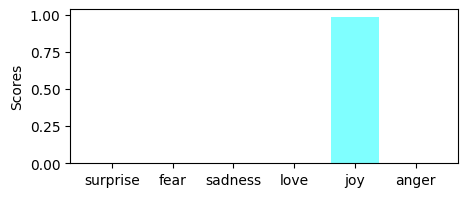

Please enter a textHappy


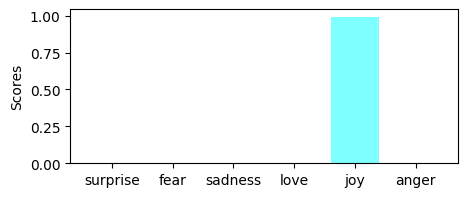

Please enter a textMy Father scolded me


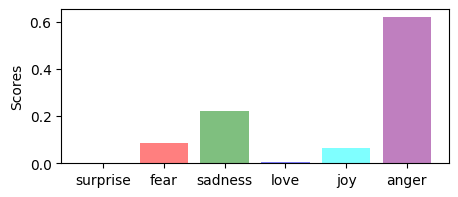

Please enter a textI sm going to Park


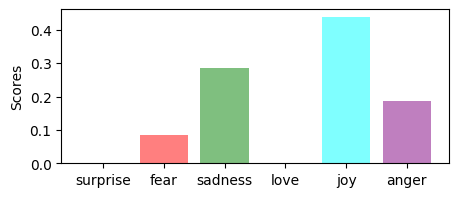

Please enter a textI am live


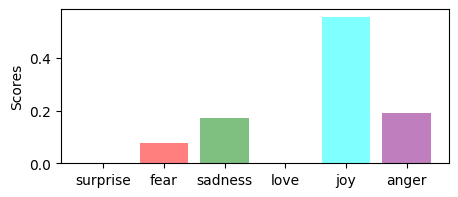

Please enter a texti am alive


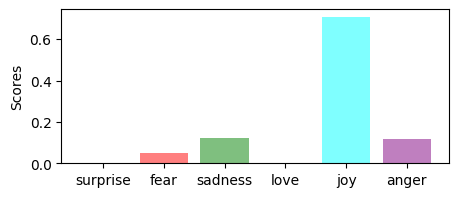

Please enter a texti take cellfood every day like clockwork because of cellfood i feel more energetic i sleep less and i don t easily get so tired


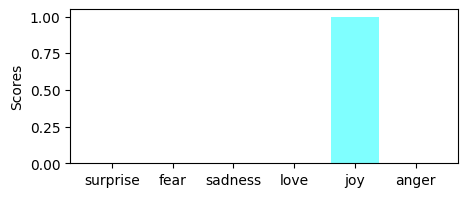

Please enter a textexit


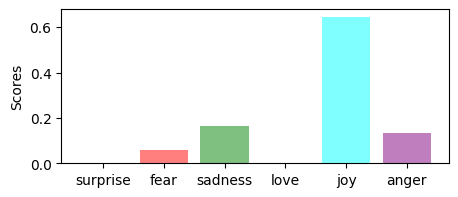

In [0]:
import random
import math

# VISUALIZATION
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
start=True
while start:
    # Select random samples to illustrate
    sample_text =input("Please enter a text").lower()
    if 'exit' in sample_text.lower():
        start=False

    # Encode samples
    tokenized_sample = sample_text.split(" ")
    encoded_samples = [[word2id[word] for word in tokenized_sample]]

    # Padding
    encoded_samples = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)

    # Make predictions
    label_probs, attentions = model_with_attentions.predict(encoded_samples)
    label_probs = {id2label[_id]: prob for (label, _id), prob in zip(label2id.items(),label_probs[0])}

    # Get word attentions using attenion vector
    token_attention_dic = {}
    max_score = 0.0
    min_score = 0.0
    for token, attention_score in zip(tokenized_sample, attentions[0][-len(tokenized_sample):]):
        token_attention_dic[token] = math.sqrt(attention_score)



    def rgb_to_hex(rgb):
        return '#%02x%02x%02x' % rgb
        
    def attention2color(attention_score):
        r = 255 - int(attention_score * 255)
        color = rgb_to_hex((255, r, r))
        return str(color)
        
    # Build HTML String to viualize attentions
    html_text = "<hr><p style='font-size: large'><b>Text:  </b>"
    for token, attention in token_attention_dic.items():
        html_text += "<span style='background-color:{};'>{} <span> ".format(attention2color(attention),
                                                                            token)
    html_text += "</p>"
    # Display text enriched with attention scores 
    display(HTML(html_text))

    # PLOT EMOTION SCORES
    emotions = [label for label, _ in label_probs.items()]
    scores = [score for _, score in label_probs.items()]
    plt.figure(figsize=(5,2))
    plt.bar(np.arange(len(emotions)), scores, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan', "purple"])
    plt.xticks(np.arange(len(emotions)), emotions)
    plt.ylabel('Scores')
    plt.show()

In [0]:
random.choice(dataset["text"].values.tolist())

'i take cellfood every day like clockwork because of cellfood i feel more energetic i sleep less and i don t easily get so tired'

In [0]:
model.save("model_emotion.h5")

In [0]:
os.listdir()

['sample_submission.csv',
 'test_data.csv',
 'emotion.data',
 'train_data.csv',
 'model_emotion.h5']